
# <center><font color= #1e8449 > <b>MAPS</font></center>

> # <font color='steelblue'> <b>SHAPE AREAS</font>

### <font color='steelblue'>Description</font>

Calcular y dibujar un "Shape Area" a partir de un conjunto de puntos dados

## <font color='green'>Settings</font>

In [1]:
# Libraries to use
import os

import alphashape
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

## <font color='green'>Data Load</font>

Se adjuntan diferentes ficheros que contienen posicionamiento Lat, Long para usar de muestra.

## <font color='red'>SE HA ELEGIDO, PARA EL EJEMPLO UTILIZAR EL FICHERO RECINTO</font>

<font color='green'><b> RECINTOS</b></font>

## <font color='red'>IMPORTANTE: MODIFICAR LA RUTA DEL FICHERO, Y EL NOMBRE DE ESTE A NECESIDAD</font>

In [2]:
directory = '../../contrib/data/'
file_name='RECINTO.csv'
data = pd.read_csv(os.path.join(directory, file_name))

In [3]:
data.head()

,Id_Recinto,Recinto,Pabellon,Latitud,Longitud,Nombre,Descripción,Ejecutante,Categoria,Subcategoria_1,...,Aforo,Precio,Fecha_Inicio,Fecha_Fin,Hora_apertura_1,Hora_cierre_1,Hora_apertura_2,Hora_cierre_2,Restricciones,Tipo_espacio
0,0,IFEMA,Centro de Convenciones Sur,40.465384,-3.616648,Puerta Sur,Entrada desde la calle hasta el Centro de Conv...,NaN,Accesos,Principal,...,NaN,Gratuito,NaN,NaN,8:00,0:00,NaN,NaN,NaN,Cerrado
1,1,IFEMA,Centro de Convenciones Sur,40.465724,-3.617218,Puerta Centro de Convenciones Sur - Pabellón1,Entrada desde el Centro de Convenciones sur ha...,NaN,Accesos,Secundario,...,NaN,Gratuito,NaN,NaN,8:00,0:00,NaN,NaN,NaN,Cerrado
2,2,IFEMA,Pabellon 1,40.465710,-3.617310,Puerta Pabellon 1 - Centro de Convenciones Sur,Entrada desde el Pabellon 1 hasta el Centro de...,NaN,Accesos,Secundario,...,NaN,Gratuito,NaN,NaN,8:00,0:00,NaN,NaN,NaN,Cerrado
3,3,IFEMA,Centro de Convenciones Sur,40.465854,-3.616237,Puerta Centro de Convenciones Sur - Pabellón 2,Entrada desde el Centro de Convenciones sur ha...,NaN,Accesos,Secundario,...,NaN,Gratuito,NaN,NaN,8:00,0:00,NaN,NaN,NaN,Cerrado
4,4,IFEMA,Pabellon 2,40.465864,-3.616141,Puerta Pabellon 2 - Centro de Convenciones Sur,Entrada desde el Pabellon 2 hasta el Centro de...,NaN,Accesos,Secundario,...,NaN,Gratuito,NaN,NaN,8:00,0:00,NaN,NaN,NaN,Cerrado


## <font color='green'>PARAMETERS</font>

Variables

In [4]:
# Nombre de la columna que representa la latitud
lat_column = "Latitud"
# Nombre de la columna que representa la longitud
lon_column = "Longitud"
# Nombre de las columnas que deben aparecer al hacer hover sobre un punto
hover_columns = ["Pabellon", "Nombre"]
# Template de la etiqueta que aparecerá al hacer hover sobre un punto
# Los datos son  accesibles a través de customdata en el orden indicado en  hover_columns
hover_template = "Pabellón:  %{customdata[0]} <br> Nombre: %{customdata[1]}"

Parámetros para configurar el aspecto del mapa

In [5]:
# Tamaño puntos
point_size = 20
# Color de los puntos
point_color = "blue"
# Color del area. En formato rgba.
fill_color = 'rgba(26,150,65,0.5)'
# Zoom inicial
zoom = 15
# Tamaño del mapa
height=500
# Tipo de mapa
map_type = 'open-street-map' # "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain",                           
            # "stamen-toner" or "stamen-watercolor" 

## <font color='green'>CALCULAR SHAPE AREA</font>

In [6]:
# Extraer puntos del dataset
points = data[[lon_column, lat_column]].values.tolist()

In [7]:
# Mostrar los puntos. SOLO PARA PROPOSITOS DE TEST

# fig, ax = plt.subplots()
# ax.scatter(data[lon_column], data[lat_column])
# plt.show()

In [8]:
# Calcular al area a partir de los puntos

# Este valor controla cuanto se ajusta el contorno del area a los puntos
alpha = 100
alpha_shape = alphashape.alphashape(points, alpha)

In [9]:
# Se puede mostrar el area. SOLO PARA PROPOSITOS DE TEST

# alpha_shape

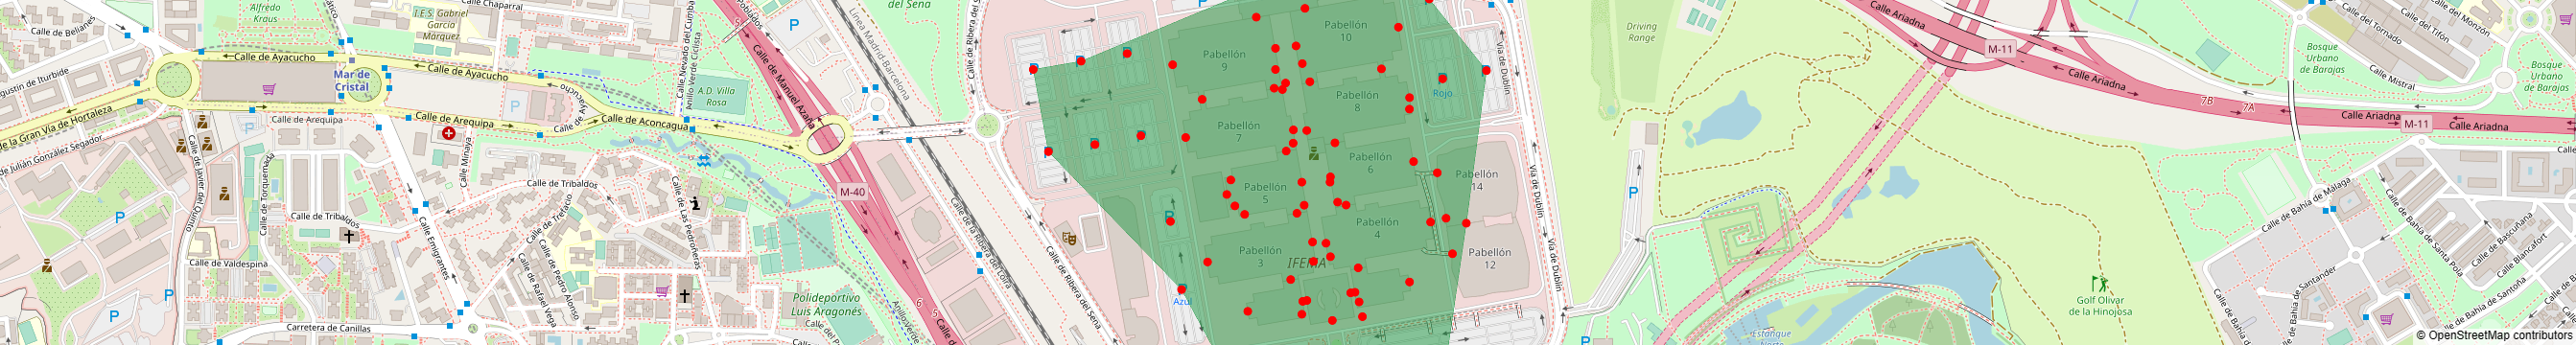

In [72]:
fig = go.Figure(
    go.Scattermapbox(
        lon=alpha_shape.exterior.coords.xy[0].tolist(),
        lat=alpha_shape.exterior.coords.xy[1].tolist(),
        fillcolor='rgba(26,150,65,0.5)',
        fill="toself"
    )
)
fig.add_scattermapbox(
    lat=data[lat_column],
    lon=data[lon_column],
    marker=go.scattermapbox.Marker(
        size=point_size,
        color=point_color
    ),
    customdata=data[hover_columns]
)
fig.update_layout(
    mapbox = {
        'style': map_type,
        'center': {
            'lat': alpha_shape.centroid.y,
            'lon': alpha_shape.centroid.x,
        },
        'zoom': zoom},
    showlegend = False)
fig.update_traces(hovertemplate=hover_template)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()